In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seeds = pd.read_csv(f'test_sloth_wiki/seeds_sloth_cc_wiki_2000samples.csv', sep=';')
# seeds_fastCheck = pd.read_csv(f'test_sloth_wiki/seedsFastCheck_sloth_cc_wiki_2000samples.csv', sep=';')

seeds = pd.read_csv(f'test_sloth_wiki/seeds_sloth_cc_wiki_2000samples.csv', sep=';')
seeds_fastCheck = pd.read_csv(f'test_sloth_wiki/seedsFastCheck_sloth_cc_wiki_2000samples.csv', sep=';')

In [2]:
def summary_stats(data):
    return {
        "min": round(np.min(data), 3),
        "max": round(np.max(data), 3),
        "mean": round(np.mean(data), 3),
        "std_dev": round(np.std(data), 3),
        "positive_ratio": round(np.sum(data > 0) / len(data), 3),
        "negative_ratio": round(np.sum(data < 0) / len(data), 3),
        "zero_ratio": round(np.sum(data == 0) / len(data), 3),
    }

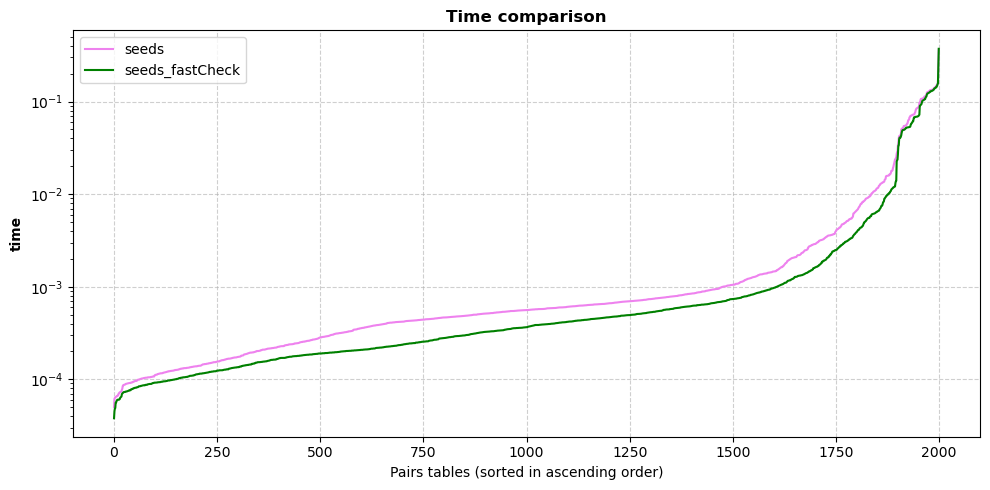

In [ ]:
plt.figure(figsize=(10, 5))
seeds_ord = seeds.sort_values(by='seeds_time')
seeds_fastCheck_ord = seeds_fastCheck.sort_values(by='seeds_time')
plt.plot(seeds_ord['seeds_time'].values, color='violet', label='seeds', markersize=4)
plt.plot(seeds_fastCheck_ord['seeds_time'].values, color='green', label='seeds_fastCheck', markersize=4)
plt.title("Time comparison", fontweight='bold')
plt.yscale('log')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("time", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [5]:
print("=== seeds ===")
sloth_stats = summary_stats(seeds['seeds_time'].values)
for k, v in sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== seeds_fastCheck ===")
sloth_constr_stats = summary_stats(seeds_fastCheck['seeds_time'].values)
for k, v in sloth_constr_stats.items():
    print(f"{k}: {v}")


=== seeds ===
min: 0.0
max: 0.367
mean: 0.006
std_dev: 0.023
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== seeds_fastCheck ===
min: 0.0
max: 0.372
mean: 0.005
std_dev: 0.022
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0


In [4]:
import hashlib
from utils import longest_common_substr_space_opt
from rapidfuzz.distance import LCSseq

def md5_hash(value):
    return hashlib.md5(str(value).encode()).hexdigest()

def blake2s_hash_short(value, digest_size=8):
    h = hashlib.blake2s(str(value).encode(), digest_size=digest_size)
    return h.hexdigest()


table_sport_a = [
    ["Manchester United",'Chelsea','', "Real Madrid"],
    ["London", "Barcelona", "Munich", "Milan", "Liverpool", "Manchester", "Milan", "Madrid"],
    ["Emirates Stadium", "Camp Nou", "Allianz Arena", "San Siro", "Anfield", "Old Trafford", "San Siro", "Santiago Bernabéu"],
    [60704, 99354, 75000, 80018, 53394, 74310, 80018, 81044]
]

table_sport_b = [
    ["Manchester United", "Chelsea",0, "Juventus"],
    ["Madrid", "Milan", "Munich", "Liverpool", "Barcelona", "Amsterdam", "Milan", "Manchester", "London", "Turin"],
    ["Spain", "Italy", "Germany", "England", "Spain", "Netherlands", "Italy", "England", "England", "Italy"],
    ["Santiago Bernabéu", "San Siro", "Allianz Arena", "Anfield", "Camp Nou", "Johan Cruyff Arena", "Giuseppe Meazza", "Old Trafford", "Stamford Bridge", "Juventus Stadium"],
    [1902, 1899, 1900, 1892, 1899, 1900, 1908, 1878, 1905, 1897]
]

hashed_table_a = [[md5_hash(cell) for cell in row] for row in table_sport_a]
hashed_table_b = [[md5_hash(cell) for cell in row] for row in table_sport_b]
print(hashed_table_a[0])
print(hashed_table_b[0])
print(longest_common_substr_space_opt(hashed_table_a[0], hashed_table_b[0]))

hashed_table_a = [[blake2s_hash_short(cell) for cell in row] for row in table_sport_a]
hashed_table_b = [[blake2s_hash_short(cell) for cell in row] for row in table_sport_b]
print(longest_common_substr_space_opt(hashed_table_a[0], hashed_table_b[0]))
print(hashed_table_a[0])
print(hashed_table_b[0])
print()

print(LCSseq.similarity(hashed_table_a[0], hashed_table_b[0]))


['9ff48521032adfb70b18b7ee00a9379c', '8056df0882080a7c1d36f190f231f919', 'd41d8cd98f00b204e9800998ecf8427e', '93330b41521461ca6c968df6a31ce1ae']
['9ff48521032adfb70b18b7ee00a9379c', '8056df0882080a7c1d36f190f231f919', 'cfcd208495d565ef66e7dff9f98764da', 'fdb4b66db0972a3b17e5d5b1ffbe4945']
2
2
['51a0a58b25d856d9', '24a77856796356ae', 'ef2a8b78dd80da9c', 'c38885dedf0fd36e']
['51a0a58b25d856d9', '24a77856796356ae', '8724d194aa96d9e2', '74f747aa6ef02e5f']

2


In [1]:
import pandas as pd
first200 = pd.read_csv('/Users/davidelupo/Desktop/sloth-main/test_sloth_mapping_git_100samples.csv',sep=';')
first400 = pd.read_csv('/Users/davidelupo/Desktop/sloth-main/test_sloth_mapping100_200_git_100samples.csv',sep=';')
first600 = pd.read_csv('/Users/davidelupo/Desktop/sloth-main/test_sloth_mapping200_400_git_200samples.csv',sep=';')

new_df = pd.concat([first200,first400,first600],ignore_index=True)
new_df.to_csv('test_sloth_git/test_sloth_mapping_git_400samples.csv', sep=';',index=False)
new_df

,r_id,s_id,seeds,algo,a%,time,gen_cands,gen_time,ver_cands,ver_time
0,object_csv_licensed.zip_IA2ComProxy.dll.csv__2...,object_csv_licensed.zip_bcastdvr.proxy.dll.csv...,4,e,0.300000,0.020159,1,0.000062,1,0.002540
1,seek_time_csv_licensed.zip_PL1331LAGRZW3H.csv,seek_time_csv_licensed.zip_PL2331LAGMH50J.csv,-1,e,0.000000,30.656555,0,0.000000,0,0.000000
2,quick_time_csv_licensed.zip_funcs_by_name_369.csv,safe_period_csv_licensed.zip_funcs_by_address_...,2,e,0.035398,0.005967,0,0.000000,0,0.000000
3,parent_csv_licensed.zip_Configuration4_window0...,parent_csv_licensed.zip_poi-1.5_56.csv,268,e,0.000000,1.464960,0,0.000000,0,0.000000
4,show_time_csv_licensed.zip_quotes.db.csv,then_csv_licensed.zip_phrasebook.csv,2,e,0.297872,0.000842,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
395,seek_time_csv_licensed.zip_PL1331LAHDZSSH.csv,seek_time_csv_licensed.zip_PL2331LAHDSL9J.csv,114,e,0.684211,0.381532,1,0.004265,1,0.013438
396,id_csv_licensed.zip_0021500174_4.csv,id_csv_licensed.zip_0021600679.csv,490,a,0.127321,7.127077,40170,0.340603,38808,3.005711
397,object_csv_licensed.zip_Configuration2_window9...,object_csv_licensed.zip_Configuration3_window1...,277,e,0.000000,1.056555,0,0.000000,0,0.000000
398,seek_time_csv_licensed.zip_PL1331LAGS5DDH.csv,seek_time_csv_licensed.zip_PL1331LAGT5X2H.csv,-1,e,0.000000,30.439950,0,0.000000,0,0.000000
